### 1. Import Required Libraries

### 2. Load Your Data

```data = pd.read_csv('your_data.csv')```

### 3. Explore and Preprocess the Data (Convert to Tensors to use Pytorch!!!!)

```print(data.info())  # Understand the structure of your data```

```data.fillna(method='ffill', inplace=True)  # Handle missing values```

### 4. Define Features and Target

`X = data.drop('target_column', axis=1)`

   `y = data['target_column']`

### 5. Split the Data

`X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`

### 6. Create the NN class

### 7. Create citerion + optimizer + add model to cuda

`criterion = nn.CrossEntropyLoss()`

`optimizer = torch.optim.Adam(model.parameters(), lr=0.001)`

### 8. Training loop

`model.train()`

`batch_y_probs = model(x_train)`

`loss = criterion(batch_y_probs, batch_y)`

`optimizer.zero_grad()`

`loss.backward()`

`optimizer.step()`


### 9. Evaluate the Model

`with torch.no_grad():`

  `y_eval = model.forward(X_test)`

  `loss = criterion(y_eval, y_test)`


# Contents:

1. Implementation of 1-2 layer NN fin pytorch which classifies MNIST dataset

About MNIST:

the dataset consists of images of 28x28 size. The image each contains a handwritten digit from 0 to 9. Our model needs to take this image and classify it to the correct digit.


You need to know:

1. **pytorch** (for impelementation)
2. a little bit of **matplotlib** (for visualization)


Good to have knowledge of:

1. torch dataset and dataloader

In [4]:
import torch

import torch.nn as nn

from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.optim import Adam

from torchvision.transforms.functional import to_tensor

import matplotlib.pyplot as plt
from IPython.display import clear_output

In [5]:
train_data = MNIST(root='./datasets', train=True, download=True, transform=to_tensor)
test_data  = MNIST(root='./datasets', train=False, download=True, transform=to_tensor)

clear_output()

In [6]:
batch_size = 64

# Dataloaders are used to easily create batches of data so we can perform batch gradient descent for faster learning
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

Model Class

In [7]:
class Model(nn.Module):
    def __init__(self, input, h1, h2, output):
        super(Model, self).__init__()
        
        self.layer1 = nn.Linear(input, h1)
        self.layer2 = nn.Linear(h1, h2)
        self.layer3 = nn.Linear(h2, output)
        
        self.activaton = nn.ReLU()
        
    def forward(self, x):
        z1 = self.layer1(x)
        a1 = self.activaton(z1)
        
        z2 = self.layer2(a1)
        a2 = self.activaton(z2)
        
        z3 = self.layer3(a2)
        return z3

Model Instance

Optimizer

Criterion

In [8]:
model = Model(28*28, 100, 50, 10)

lr = 1e-4
epochs = 12


optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss() # For multiClass

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # checks if machine supports cuda and if it does, we use that, otherwise cpu
model.to(device)
print(f'Using device {device}')

Using device cuda


Check the size of x, y

In [9]:
for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


Training Loop

Epoch: 0, train_loss=1.0300989752054215
Epoch: 1, train_loss=0.39816839495897294
Epoch: 2, train_loss=0.32688268643220264
Epoch: 3, train_loss=0.2886667610069116
Epoch: 4, train_loss=0.26112777597308157
Epoch: 5, train_loss=0.23902301475405693
Epoch: 6, train_loss=0.22056051707863808
Epoch: 7, train_loss=0.2047259942173958
Epoch: 8, train_loss=0.1910862295726935
Epoch: 9, train_loss=0.17920544263919194
Epoch: 10, train_loss=0.16877094275852045
Epoch: 11, train_loss=0.15946274343679348


Text(0, 0.5, 'Loss (Cross Entropy)')

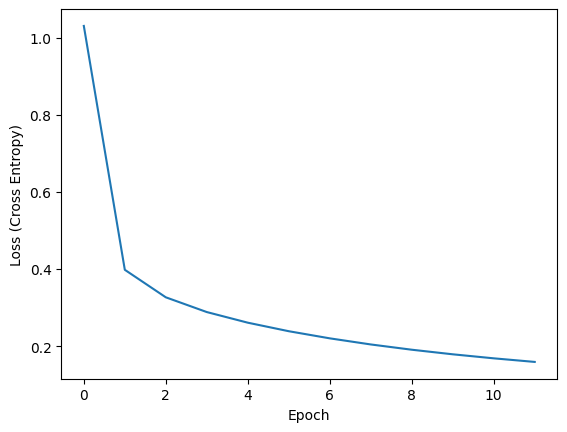

In [23]:
train_losses = []

for epoch in range(epochs):
    model.train()   # Training Mode
    epoch_weighted_loss = 0     # Loss Counter (For plotting)
    
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.view(-1, 28*28).to(device)       # Resize (flatten) - (view in pytorch == reshape in numpy) 
        batch_y = batch_y.to(device)       # Resize (flatten) - (view in pytorch == reshape in numpy) 
        
        pred = model(batch_x)   # model output
        
        loss = criterion(pred, batch_y) # loss
        
        # Updating weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_weighted_loss += (len(batch_y)*loss.item()) # for plotting purpose
    
    epoch_loss = epoch_weighted_loss/len(train_loader.dataset)
    train_losses.append(epoch_loss)    # add loss for tracking
    print(f'Epoch: {epoch+1}, train_loss={epoch_loss}')

plt.plot(train_losses, label='train loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (Cross Entropy)')

    

Another Training loop

Epoch [1/12] started...
Epoch [1/12] completed. Loss: 1.0011
Epoch [2/12] started...
Epoch [2/12] completed. Loss: 0.6854
Epoch [3/12] started...
Epoch [3/12] completed. Loss: 0.5604
Epoch [4/12] started...
Epoch [4/12] completed. Loss: 0.4903
Epoch [5/12] started...
Epoch [5/12] completed. Loss: 0.4436
Epoch [6/12] started...
Epoch [6/12] completed. Loss: 0.4092
Epoch [7/12] started...
Epoch [7/12] completed. Loss: 0.3822
Epoch [8/12] started...
Epoch [8/12] completed. Loss: 0.3599
Epoch [9/12] started...
Epoch [9/12] completed. Loss: 0.3410
Epoch [10/12] started...
Epoch [10/12] completed. Loss: 0.3247
Epoch [11/12] started...
Epoch [11/12] completed. Loss: 0.3103
Epoch [12/12] started...
Epoch [12/12] completed. Loss: 0.2975


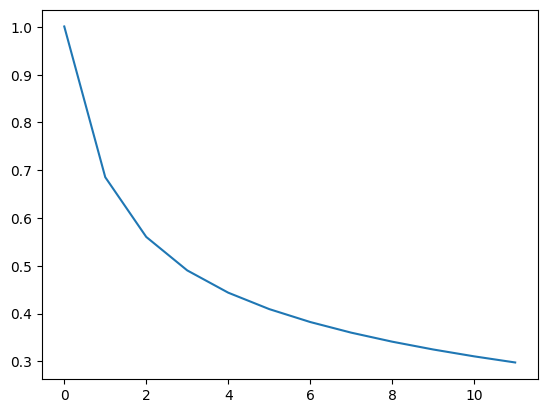

In [11]:
total_loss = 0
ls = []

for epoch in range(epochs):
    print(f'Epoch [{epoch+1}/{epochs}] started...')
    
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.view(-1, 28*28).to(device), labels.to(device)  # Move inputs and labels to the device('cuda:0')
        
        outputs = model(inputs)
        
        optimizer.zero_grad()  # zero the gradients
        loss = criterion(outputs, labels)
        loss.backward()  # compute gradients
        optimizer.step()  # update the weights -lr * gradient
        
        total_loss += loss.item()
    
    loss = total_loss / ((epoch + 1) * len(train_loader))
    ls.append(loss)
    print(f'Epoch [{epoch+1}/{epochs}] completed. Loss: {loss:.4f}')
# Plot the training loss
plt.plot(ls)

Model Evaluation (on test dataset)

In [12]:
model.eval()
correctly_labelled = 0 # for accuracy

# Same as training loop but without updating the weights
with torch.no_grad():
    val_epoch_weighted_loss = 0

    for batch_x, batch_y in test_loader:
        batch_x = batch_x.view(-1, 28*28).to(device)
        batch_y = batch_y.to(device)
        
        y_pred = model(batch_x)
        
        loss = criterion(y_pred, batch_y)
        
        val_epoch_weighted_loss += (len(batch_y)*loss.item())

        val_batch_y_pred = y_pred.argmax(dim=1)  # convert probailities to labels by picking the label (index) with the highest prob

        correctly_labelled += (val_batch_y_pred == batch_y).sum().item()  # item converts tensor to float/int/list

print(f'labelled {correctly_labelled}/{len(test_loader.dataset)} correctly ({correctly_labelled/len(test_loader.dataset)*100}% accuracy)')


labelled 9551/10000 correctly (95.50999999999999% accuracy)
